In [2]:
import polars as pl

DATA_PATH = "../../data/"
train = pl.read_csv(DATA_PATH + "train.csv")

import json

with open(DATA_PATH + "essay_id_topic_dict.json", "r") as f:
    essay_id_topic_dict = json.load(f)

In [9]:
pl.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
train = train.with_columns(
    pl.col("essay_id").replace(essay_id_topic_dict).alias("topic_id")
)

In [4]:
train = train.with_columns(
    pl.col("full_text")
    .map_elements(lambda x: len(x.split()), return_dtype=pl.Int64)
    .alias("word_length"),
)

<Axes: xlabel='word_length', ylabel='score'>

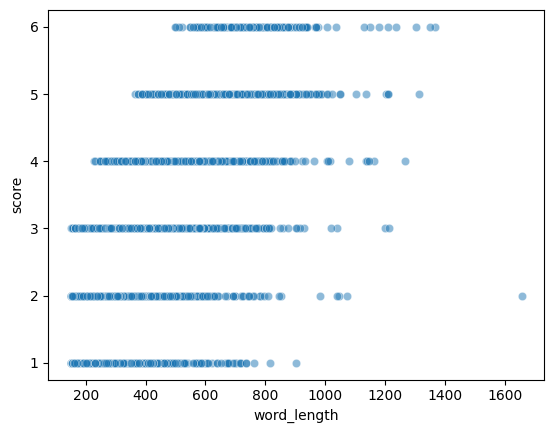

In [5]:
import seaborn as sns

sns.scatterplot(train.to_pandas(), x="word_length", y="score", alpha=0.5)

In [22]:
train = train.with_columns(
    pl.when(pl.col("word_length") <= 200)
    .then(pl.lit("x<=200"))
    .when(pl.col("word_length") <= 400)
    .then(pl.lit("200<x<=400"))
    .when(pl.col("word_length") <= 600)
    .then(pl.lit("400<x<=600"))
    .when(pl.col("word_length") <= 800)
    .then(pl.lit("600<x<=800"))
    .when(pl.col("word_length") <= 1000)
    .then(pl.lit("800<x<=1000"))
    .when(pl.col("word_length") <= 1200)
    .then(pl.lit("1000<x<=1200"))
    .when(pl.col("word_length") > 1200)
    .then(pl.lit("x>1200"))
    .alias("word_length_cat"),
)

In [27]:
train = train.with_columns(
    pl.concat_str(
        pl.col("score"),
        pl.col("word_length_cat"),
        separator="_",
    ).alias("score_word_length_cat")
).with_columns(
    pl.concat_str(
        pl.col("score_word_length_cat"),
        pl.col("topic_id"),
        separator="_",
    ).alias("concat_score_word_length_topic_id")
)

In [28]:
train.head(10)

essay_id,full_text,score,topic_id,word_length,word_length_cat,score_word_length_cat,concat_score_word_length_topic_id
str,str,i64,str,i64,str,str,str
"""000d118""","""Many people have car where the…",3,"""5""",498,"""400<x<=600""","""3_400<x<=600""","""3_400<x<=600_5"""
"""000fe60""","""I am a scientist at NASA that …",3,"""3""",332,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_3"""
"""001ab80""","""People always wish they had th…",4,"""6""",550,"""400<x<=600""","""4_400<x<=600""","""4_400<x<=600_6"""
"""001bdc0""","""We all heard about Venus, the …",4,"""1""",451,"""400<x<=600""","""4_400<x<=600""","""4_400<x<=600_1"""
"""002ba53""","""Dear, State Senator This is a…",3,"""4""",373,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_4"""
"""0030e86""","""If I were to choose between ke…",4,"""4""",400,"""200<x<=400""","""4_200<x<=400""","""4_200<x<=400_4"""
"""0033037""","""The posibilty of a face reconi…",2,"""0""",179,"""x<=200""","""2_x<=200""","""2_x<=200_0"""
"""0033bf4""","""What is the Seagoing Cowboys p…",3,"""9""",353,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_9"""
"""0036253""","""The challenge of exploring Ven…",2,"""1""",310,"""200<x<=400""","""2_200<x<=400""","""2_200<x<=400_1"""


In [29]:
(
    train.select(
        pl.col("concat_score_word_length_topic_id").value_counts(),
    )
    .unnest("concat_score_word_length_topic_id")
    .with_columns((pl.col("count") / train.height).alias("percentage"))
    .sort("count", descending=True)
)

concat_score_word_length_topic_id,count,percentage
str,u32,f64
"""3_200<x<=400_0""",910,0.05258
"""3_200<x<=400_1""",737,0.042584
"""3_200<x<=400_3""",617,0.03565
"""2_200<x<=400_1""",576,0.033281
"""3_200<x<=400_6""",539,0.031143
"""3_200<x<=400_9""",512,0.029583
"""2_200<x<=400_0""",504,0.029121
"""4_400<x<=600_6""",442,0.025539
"""2_200<x<=400_9""",439,0.025365


In [30]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

fold_arr = np.zeros(train.height)
sgkf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for idx, (_, val_idx) in enumerate(
    sgkf.split(train, train["concat_score_word_length_topic_id"])
):
    fold_arr[val_idx] = idx

train = train.with_columns(pl.Series(fold_arr).cast(pl.Int64).alias("fold"))

/Users/shinichiro.saito/automated_essay_scoring/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [32]:
train.head(10)

essay_id,full_text,score,topic_id,word_length,word_length_cat,score_word_length_cat,concat_score_word_length_topic_id,fold
str,str,i64,str,i64,str,str,str,i64
"""000d118""","""Many people have car where the…",3,"""5""",498,"""400<x<=600""","""3_400<x<=600""","""3_400<x<=600_5""",0
"""000fe60""","""I am a scientist at NASA that …",3,"""3""",332,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_3""",2
"""001ab80""","""People always wish they had th…",4,"""6""",550,"""400<x<=600""","""4_400<x<=600""","""4_400<x<=600_6""",1
"""001bdc0""","""We all heard about Venus, the …",4,"""1""",451,"""400<x<=600""","""4_400<x<=600""","""4_400<x<=600_1""",0
"""002ba53""","""Dear, State Senator This is a…",3,"""4""",373,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_4""",1
"""0030e86""","""If I were to choose between ke…",4,"""4""",400,"""200<x<=400""","""4_200<x<=400""","""4_200<x<=400_4""",1
"""0033037""","""The posibilty of a face reconi…",2,"""0""",179,"""x<=200""","""2_x<=200""","""2_x<=200_0""",1
"""0033bf4""","""What is the Seagoing Cowboys p…",3,"""9""",353,"""200<x<=400""","""3_200<x<=400""","""3_200<x<=400_9""",2
"""0036253""","""The challenge of exploring Ven…",2,"""1""",310,"""200<x<=400""","""2_200<x<=400""","""2_200<x<=400_1""",0


In [33]:
essay_id_fold_dict = dict(zip(train["essay_id"], train["fold"]))

import json

with open("essay_id_fold_by_slt_dict.json", "w") as f:
    # slt = score length topic
    json.dump(essay_id_fold_dict, f)

# Check

In [36]:
(
    train.filter(pl.col("fold") == 0)
    .select(
        pl.col("concat_score_word_length_topic_id").value_counts(),
    )
    .unnest("concat_score_word_length_topic_id")
    .with_columns((pl.col("count") / train.height).alias("percentage"))
    .sort("count", descending=True)
    .head(10)
)

concat_score_word_length_topic_id,count,percentage
str,u32,f64
"""3_200<x<=400_0""",303,0.017507
"""3_200<x<=400_1""",246,0.014214
"""3_200<x<=400_3""",206,0.011903
"""2_200<x<=400_1""",192,0.011094
"""3_200<x<=400_6""",179,0.010343
"""3_200<x<=400_9""",170,0.009823
"""2_200<x<=400_0""",168,0.009707
"""4_400<x<=600_6""",147,0.008494
"""2_200<x<=400_9""",146,0.008436


In [40]:
(
    train.filter(pl.col("fold") == 1)
    .select(
        pl.col("concat_score_word_length_topic_id").value_counts(),
    )
    .unnest("concat_score_word_length_topic_id")
    .with_columns((pl.col("count") / train.height).alias("percentage"))
    .sort("count", descending=True)
    .head(10)
)

concat_score_word_length_topic_id,count,percentage
str,u32,f64
"""3_200<x<=400_0""",303,0.017507
"""3_200<x<=400_1""",245,0.014156
"""3_200<x<=400_3""",206,0.011903
"""2_200<x<=400_1""",192,0.011094
"""3_200<x<=400_6""",180,0.0104
"""3_200<x<=400_9""",171,0.00988
"""2_200<x<=400_0""",168,0.009707
"""4_400<x<=600_6""",147,0.008494
"""2_200<x<=400_9""",146,0.008436


In [41]:
# (
#     train.filter(pl.col("fold") == 0)
#     .select(
#         pl.col("score").value_counts(),
#     )
#     .unnest("score")
#     .with_columns((pl.col("count") / train.height).alias("percentage"))
#     .sort("count", descending=True)
# )

In [38]:
# (
#     train.filter(pl.col("fold") == 0)
#     .select(
#         pl.col("word_length_cat").value_counts(),
#     )
#     .unnest("word_length_cat")
#     .with_columns((pl.col("count") / train.height).alias("percentage"))
#     .sort("count", descending=True)
# )

In [39]:
# (
#     train.filter(pl.col("fold") == 1)
#     .select(
#         pl.col("word_length_cat").value_counts(),
#     )
#     .unnest("word_length_cat")
#     .with_columns((pl.col("count") / train.height).alias("percentage"))
#     .sort("count", descending=True)
# )